<a href="https://colab.research.google.com/github/TrulyAstonishin/TrulyAstonishin.github.io/blob/main/Another_copy_of_KAIAI24_B2_Ex2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tasks: Implement a logistic regression model to classify two classes each class represent an integer either 3 or 8

## 1) Implement a suitable loss for the problem
## 2) Train a logistic regression model using Numpy (other libraries are not allowed)
## 3) Plot the training loss
## 4) Show the test Accuracy

## Do not touch this part

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from torchvision.datasets import MNIST
import torchvision.transforms as T

In [3]:
train_dataset = MNIST("/", download = True, train = True, transform = T.ToTensor())
test_dataset = MNIST("/", download = True, train = False, transform = T.ToTensor())

100%|██████████| 9912422/9912422 [00:00<00:00, 122370762.33it/s]


Extracting /MNIST/raw/train-images-idx3-ubyte.gz to /MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 43433378.93it/s]


Extracting /MNIST/raw/train-labels-idx1-ubyte.gz to /MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 31712780.22it/s]


Extracting /MNIST/raw/t10k-images-idx3-ubyte.gz to /MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 4516483.82it/s]

Extracting /MNIST/raw/t10k-labels-idx1-ubyte.gz to /MNIST/raw



In [4]:
# Filter out classes 3 and 8
train_indices = ((train_dataset.targets == 3) | (train_dataset.targets == 8))
train_dataset.targets = train_dataset.targets[train_indices]
train_dataset.data = train_dataset.data[train_indices]

test_indices = ((test_dataset.targets == 3) | (test_dataset.targets == 8))
test_dataset.targets = test_dataset.targets[test_indices]
test_dataset.data = test_dataset.data[test_indices]

In [57]:
X_train, y_train = train_dataset.data[:784], train_dataset.targets[:784]
X_test, y_test = test_dataset.data[:784], test_dataset.targets[:784]

In [58]:
X_train = X_train.numpy()
y_train = y_train.numpy()
X_test = X_test.numpy()
y_test = y_test.numpy()

In [70]:
print(np.shape(X_train))

print(np.shape(y_train))

print(np.shape(X_test))

print(np.shape(y_test))


(784, 784)
(784,)
(784, 28, 28)
(784,)


## Implement a suitable loss for this task

In [71]:
def sigmoid(z):

    sig = 1/ (1+np.exp(-z))

    return sig


def log_reg_cost(y_train, y_pred):  # cross entropy
    CEL = -np.mean(y_train * np.log(y_pred+0.001)+(1-y_train)* np.log(1-y_pred+0.001))
    return CEL


def log_reg_gradient_descent(X_train, y_train, learning_rate, n_iters=500):
    """
    Runs gradient descent (param optimization) for logistic regression and returns optimized weights.
    """
    n , m = X_train.shape
    theta = np.zeros(m)

    losses = []

    for _ in range(n_iters):
        z = np.dot(X_train,theta) #can use np.dot(x,theta)
        y_pred = sigmoid(z)
        gradient = X_train.T @ (y_pred-y_train) / n #np.dot(X_train.T,(y_pred - y_train))/n
        theta -= learning_rate * gradient

        loss = log_reg_cost(y_train,y_pred)
        losses.append(loss)

    plt.plot(losses)

    return theta



In [72]:
from re import X
print(X_train.shape)

print(y_train.shape)

(784, 784)
(784,)


## Train a logistic regression model using numpy (other libraries are not allowed)

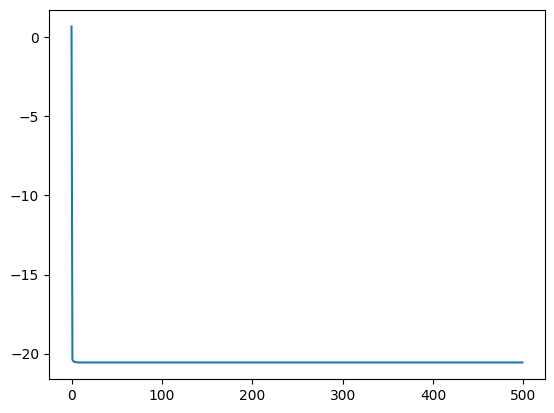

In [73]:
num_iters = 2000000
lr = 1e-3
X_train = X_train.reshape(-1, 28 * 28).T # reshape X --->(784, bs)
theta= log_reg_gradient_descent(X_train,y_train,lr)

## Plot the training loss

In [75]:
# TODO
y_pred = sigmoid(np.dot(X_train, theta))  # output of sigmoid is in range 0-1
y_pred = np.round(y_pred)  # round to 0 or 1

correct_mask = (y_pred == y_test+y_train)
correct_count = correct_mask.sum()
total_count = len(y_pred)

print(f'The model predicted {correct_count} out of {total_count} predictions correctly')
print(f'The Accuracy is {correct_count/total_count} ({correct_count/total_count*100}%)')

The model predicted 0 out of 784 predictions correctly
The Accuracy is 0.0 (0.0%)


## Show the test accuracy

In [ ]:
# TODO
